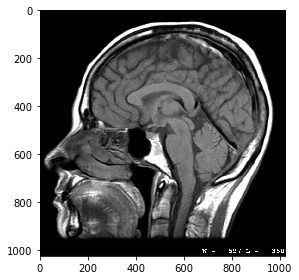

Original (8-bit encoding) the range is: 255


In [1]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#the simplest way to open and display an image uses the novice module from skimage
brainpic = novice.open('braincomplete.png')
brainpic.show()

#however, we will use instead the matplotlib image modules to obtain arrays that we can manipulate
#the 8-bit data in the PNG will be converted to floating point data between 0 and 1 by imread
#unless you ask it to Flatten=True
brainpicarray = mpimg.imread('braincomplete.png','True') 
print('Original (8-bit encoding) the range is: '+str(np.max(brainpicarray))) #showing max value in the image

We open the original image which is 8 bit encoded and has the maximum value of 255 in an array.

We see that this image has a very large number of very dark and very bright pixels therefore, rescaling alone does not increase the visibility of the image. 

Better techniques to modify the rendering of this images are as discussed in class manipulating the histogram, for instance, we can use a histogram equalization

To modify the rendering of the image the histogram of the image needs to be manipulated to obtain a image which is clearer by increasing the contrast of the image. This can be done using two techniques.
1. Histogram Equalisation 
2. Adaptive Histogram Equalisation.

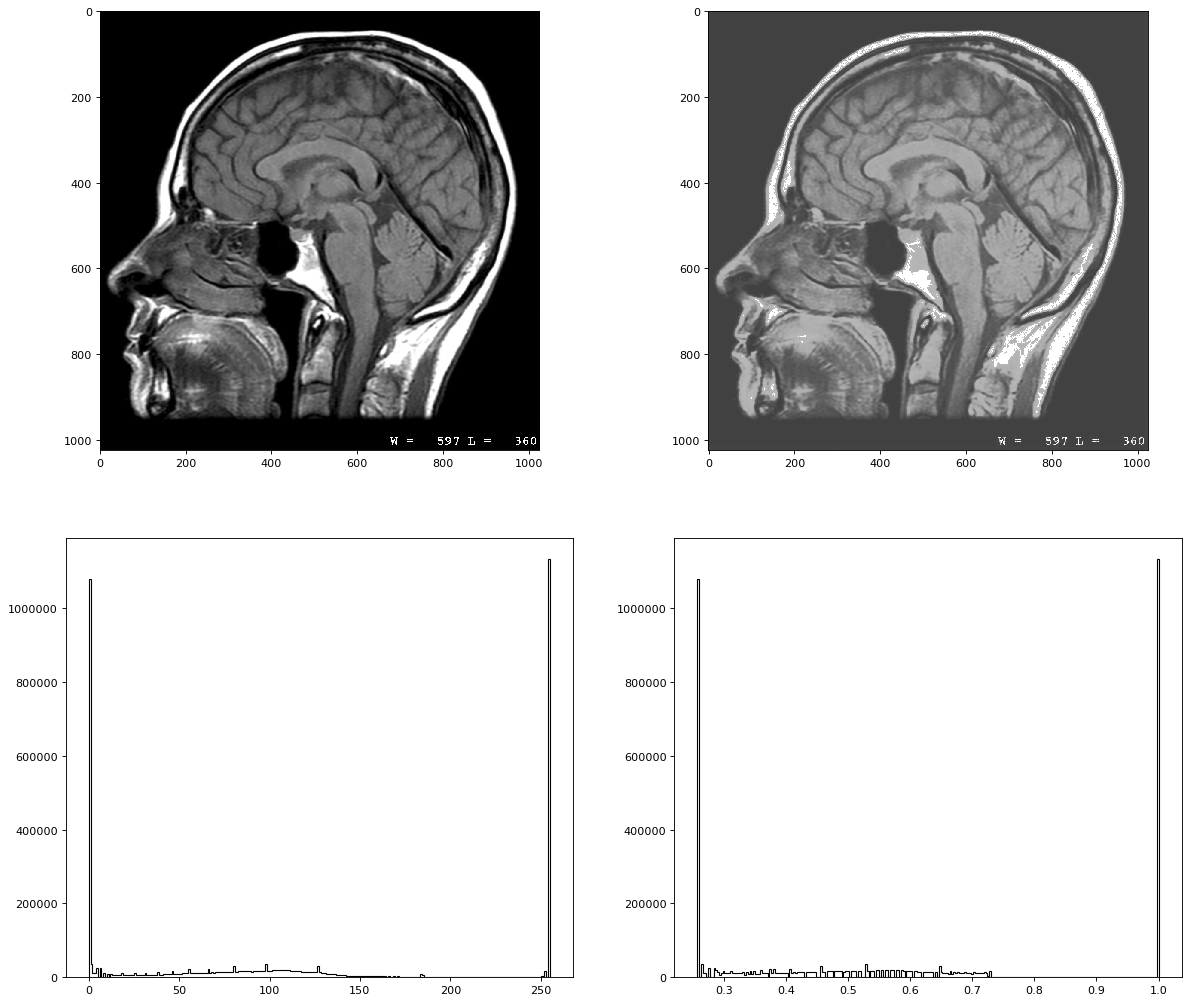

In [2]:
ig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_eq = exposure.equalize_hist(brainpicarray)
plt.subplot(221)
plt.imshow(brainpicarray)
plt.subplot(222)
plt.imshow(img_eq)
plt.subplot(223)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='black')

#### Histrogram Equalisation.

We use the original image to equalise inorder to get a clearer image. In this technique we use the Global Histogram Equalisation technique. We see that the image obtained after the global histogram equalisation, the contrast of the image is changed. We acquire almost the same image with different contrast effect making the entire image look clear than the original image. 

To get more enhanced view of the image we use Contrast Limited Adaptive Histogram Equalisation (CLAHE) i.e. Adaptive Histogram Equalisation.
 

C:\Users\sagar\Anaconda\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


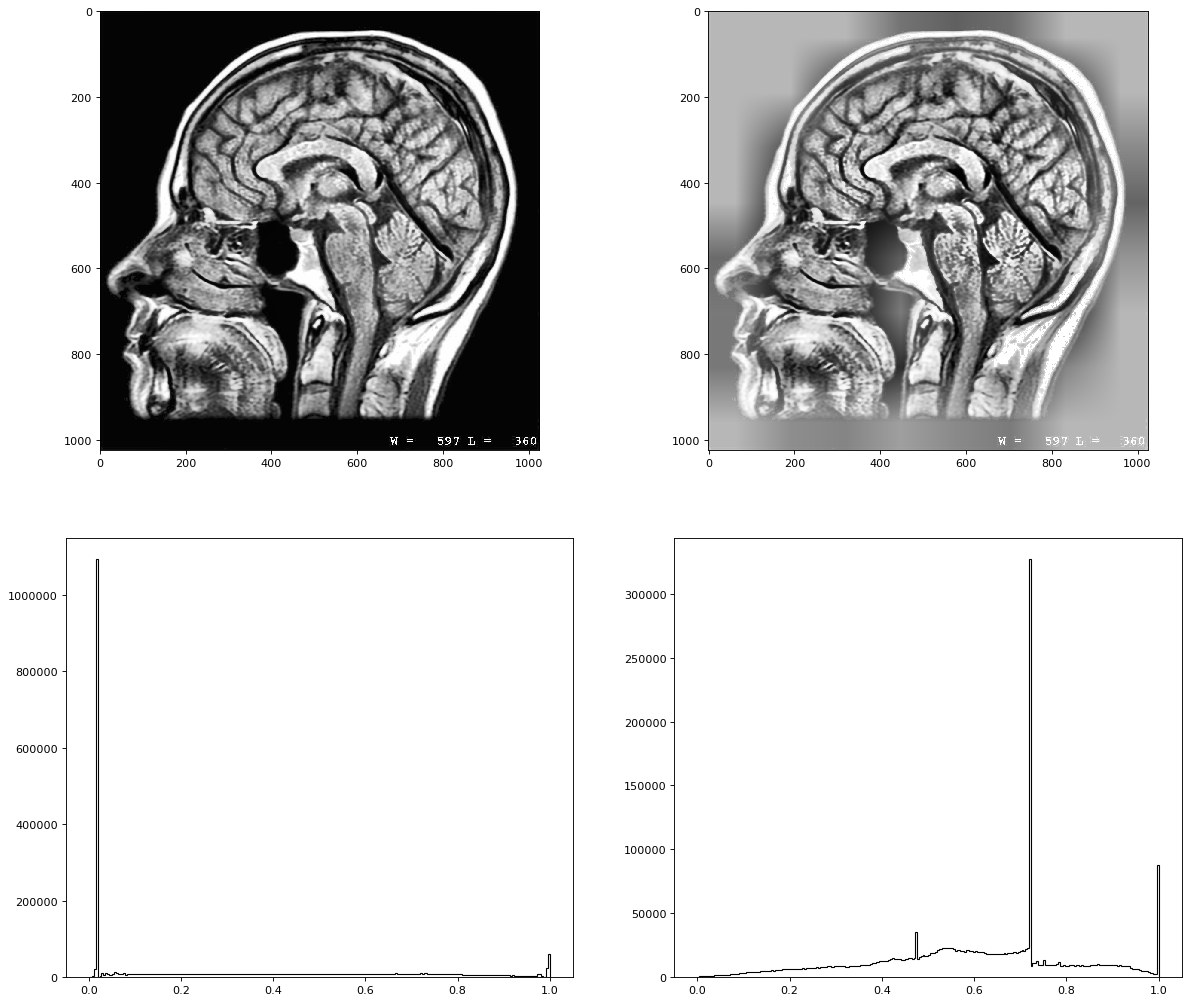

In [3]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.02, tileGridSize=(8,8))
img_adapteq1 = exposure.equalize_adapthist(brainpicarray, clip_limit=0.72, tileGridSize=(8,8)) # Ref[1] : clip-limit should be between 0 & 1
plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(img_adapteq1)
plt.subplot(223)
ht=plt.hist(img_adapteq.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(img_adapteq1.ravel(), bins=256, histtype='step', color='black')

#### Adaptive Histrogram Equalisation.

We use the original image to equalise inorder to get a more clearer image. In this technique we use the adaptive histogram equalisation. We see that the image obtained after the adaptive histogram equalisation, the image is more clearer than the equalisation histogram. 

We therefore see that adaptive histogram equalisation technique is better than the Global histogram equalisation technique.


### Equalize_hist:

Global Histogram Equalisation can be defined as follows:[1]

#### Syntax : 
##### exposure.equalize_hist(image, nbins=256, mask=None)

#### Parameters : 
1. image = array : 
Image Array

2. nbins : int, optional : 
Number of bins for image histogram.

3. mask: ndarray of bools or 0s and 1s, optional : 
Array of same shape as image. Only points at which mask == True are used for the equalization, which is applied to the whole image

#### Returns:
1. out : float array : 
Image array after histogram equalization

equalize_hist is a function which stretches the histogram of a image to normally improve the contrast of the image. To do this, we need transformation function which maps the input pixels in brighter region to output pixels in full region. [2] The images used in this technique are usually in greyscale and The algorithm normalizes the brightness and increases the contrast of the image.[1]


### Equalize_adapthist:

Contrast Limited Adaptive Histogram Equalisation (CLAHE) can be defined as follows:[1]

##### exposure.equalize_adapthist(image, kernel_size=None, clip_limit=0.01, nbins=256)

Parameters:
1. image : (M, N[, C]) ndarray : 
Input image.

2. kernel_size: integer or list-like, optional : 
Defines the shape of contextual regions used in the algorithm. If iterable is passed, it must have the same number of elements as image.ndim (without color channel). If integer, it is broadcasted to each image dimension. By default, kernel_size is 1/8 of image height by 1/8 of its width.

3. clip_limit : float, optional : 
Clipping limit, normalized between 0 and 1 (higher values give more contrast).

4. nbins : int, optional :
Number of gray bins for histogram (“data range”).

Returns:

1. out : (M, N[, C]) ndarray :
Equalized image.

equalize_adapthist is a function in which the image is divided into small blocks called tiles which has a default tileSize of 8x8.[2] The histogram of each of small region block is equalized and hence we get more detail and the image is more clear than the one we obtained from global histogram equalisation. This algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image.[1]


In your own words, when would you use adaptive histogram equalization vs standard histogram equalization?   Which  one  was  more  useful  in  the  Notebook  for  you  to  notice  details  in  the anatomy?

Adaptive Histogram equalisation deals with equalising the histogram of an image by dividing the image into small blocks called tiles in tilesize of 8x8 while global or standard histogram equalisation deals with improving the overall contrast of the image. Therefore, we should use adaptive histogram equalisation technique for the images with more complex detail for eg. brain image and other biomedical images. This technique helps find more details from the image. On the other hand standard histogram equalisation should be used on images where all pixels area confined to high values. In other words, this technique can be used only when the images in which the contrast of the images needs improvement. From the notebook, we see that adaptive histogram equalisation helps to notice the details in more depth in the anatomy 


Bibliography:

[1] http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist
    
[2] Chap 1.4 Image Processing in OpenCV - OpenCV-Python Tutorials Documentation, Release 1 (April 11, 2017) by Alexander Mordvintsev & Abid K    